# Load the data and preprocess

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf

SEED = 42
folder_path = '../mnist-png' #  'C:/Users/gurau/Desktop/Jupyter_Lab/3. Computer Vision/MNIST/mnist-png'  # 
np.random.seed(SEED)
tf.random.set_seed(SEED)

def read_imgs(ds_type, folder_path):
    folder = os.path.join(folder_path, ds_type)
    images, labels = [], []
    
    for digit in os.listdir(folder):
        files_path = os.path.join(folder, digit)
        for image in os.listdir(files_path):
            image_path = os.path.join(files_path, image)
            img = cv2.imread(image_path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # img = img.reshape(-1)
            img = img / 255.0
            images.append(img)
            labels.append(int(digit))

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

train_images, train_labels = read_imgs('train', folder_path)
test_images, test_labels = read_imgs('test', folder_path)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Shuffle the instances:

In [2]:
shuffle_indices = np.random.permutation(len(train_images))
train_images = train_images[shuffle_indices]
train_labels = train_labels[shuffle_indices]


In [3]:
shuffle_indices = np.random.permutation(len(test_images))
test_images = test_images[shuffle_indices]
test_labels = test_labels[shuffle_indices]


# Dataset and training config params

In [4]:
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 28
    IMG_WIDTH: int = 28
    NUM_CHANNELS: int = 3
    
class TrainingConfig:
    EPOCHS: int = 31
    BATCH_SIZE: int = 64
    LEARNING_RATE: int = 0.001

# CNN definition (Similar to VGG-16):

![Network Structure](CNN_Structure.png)

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

def define_CNN(input_shape=(DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH, DatasetConfig.NUM_CHANNELS)):
    model = Sequential()
    # ----------------------------------------- 
    # Conv Block 1
    # ----------------------------------------- 
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ----------------------------------------- 
    # Conv Block 2
    # ----------------------------------------- 
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ----------------------------------------- 
    # Conv Block 3
    # ----------------------------------------- 
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ----------------------------------------- 
    # Flatten & Dense layers
    # ----------------------------------------- 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [6]:
model = define_CNN()
model.summary()

C:\Users\gurau\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,978 (1.68 MB)

 Trainable params: 439,978 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

## Time to compile: 

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
erlstop = EarlyStopping(patience=4, restore_best_weights=True)

In [9]:
history = model.fit(train_images, train_labels, batch_size=TrainingConfig.BATCH_SIZE, epochs=TrainingConfig.EPOCHS, verbose=1, validation_split=.3, callbacks=[erlstop])

Epoch 1/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8625 - loss: 0.4162 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 2/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9817 - loss: 0.0602 - val_accuracy: 0.9777 - val_loss: 0.0748
Epoch 3/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.9868 - loss: 0.0436 - val_accuracy: 0.9861 - val_loss: 0.0639
Epoch 4/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9864 - val_loss: 0.0543
Epoch 5/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9912 - loss: 0.0258 - val_accuracy: 0.9908 - val_loss: 0.0395
Epoch 6/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9882 - val_loss: 0.0534
Epoch 7/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9866 - val_loss: 0.0534
Epoch 8/31
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.9938 - loss: 0.0193 - 

# Analysing the results

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None, num_epochs= TrainingConfig.EPOCHS):
    fig, ax = plt.subplots(figsize=(8,5))

    if not(isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, num_epochs])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    # plt.gird(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

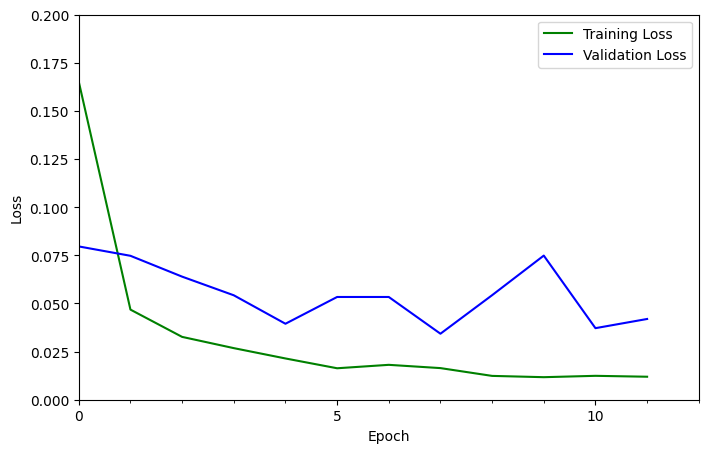

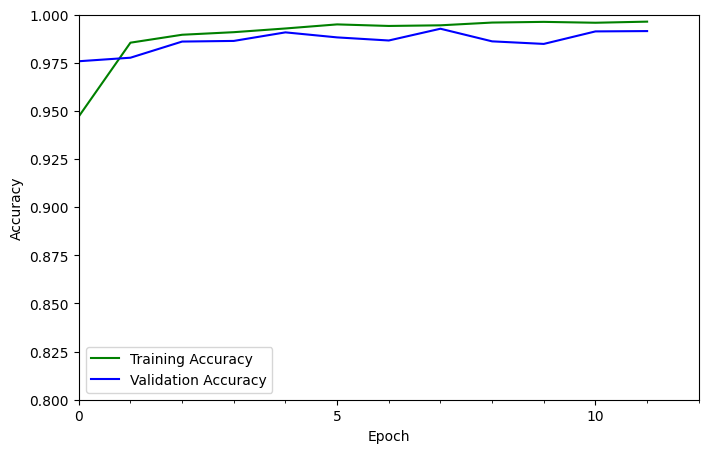

In [33]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

plot_results([train_loss, valid_loss], ylabel='Loss', ylim=[0.0, 0.2], metric_name=['Training Loss', 'Validation Loss'], color=['g', 'b'], num_epochs=len(train_loss))

plot_results([train_acc, valid_acc], ylabel='Accuracy', ylim=[0.8, 1.0], metric_name=['Training Accuracy', 'Validation Accuracy'], color=['g', 'b'], num_epochs=len(train_loss))


In [20]:
my_i, my_l = read_imgs('MyTestBatch', folder_path)

In [21]:
my_l = to_categorical(train_labels, num_classes=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


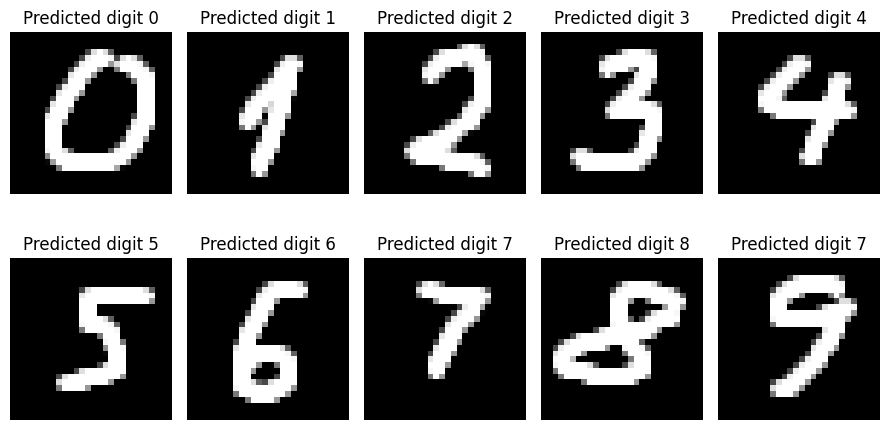

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(9, 5))  
axes = axes.flatten()

pred = model.predict(my_i)

for i in range(10):
    axes[i].imshow(my_i[i], cmap='gray')
    axes[i].set_title(f"Predicted digit {np.argmax(pred[i])}")
    axes[i].axis('off')

plt.tight_layout()

plt.show()

In [23]:
pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [24]:
# Make predictions
predictions = np.argmax(pred, axis=-1)  # Convert one-hot encoded predictions to class labels
true_labels = np.argmax(test_labels, axis=-1) 

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_labels, predictions)
print("Model's accuracy:", accuracy_score(true_labels, predictions))

Model's accuracy: 0.9925


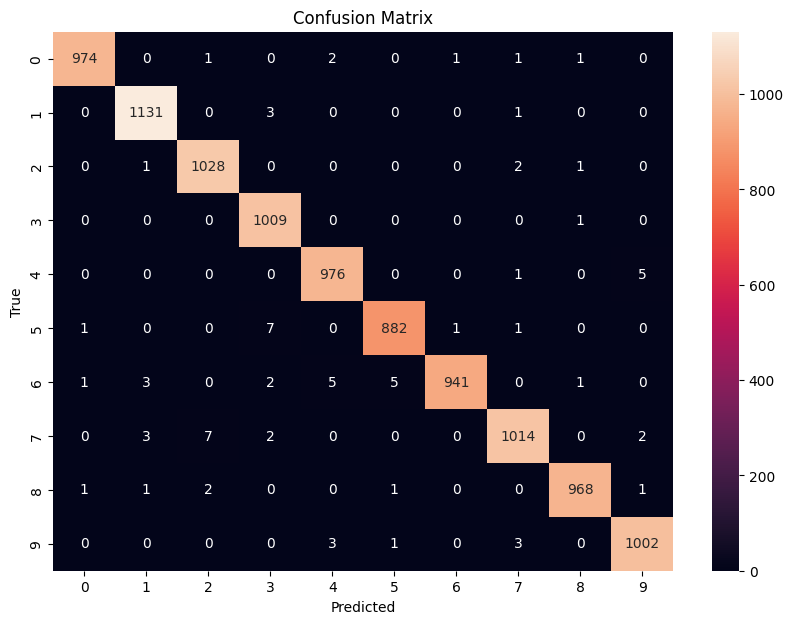

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.arange(cm.shape[0]), yticklabels=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()